# 01. Introducción al modelo de aprendizaje PAC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [35]:
# Obtener una muestra de m elementos
def getSample(m):
    return np.random.uniform(0,2,(m,2))

In [36]:
# Obtener la parametrizacion de la clase de hipotesis
def getHypothesisClass(l):
    return np.linspace(0,1,round(1/l))

In [37]:
# Error empirico
def LS(h,S):
    error = 0
    d = 1/np.sqrt(2)
    for i in range(len(S)):
        # Si h lo calsifica como elemento de X1
        inX0 = ((S[i][0] < 1-d) or (S[i][1] < 1-d) or (S[i][0] > 1+d) or (S[i][1] > 1+d)) 
        if ((S[i][0] > h) and (S[i][1] > h) and (S[i][0] < 2-h) and (S[i][1] < 2-h)):
            # Y no pertenece a X1
            if inX0:
                error = error+1
        # Si h lo clasifica como elemento de X0
        else:
            # Pero no pertenece a X0
            if not inX0:
                error = error+1
    return error/len(S)

In [38]:
# Error de generalizacion
def LD(h):
    lim = 1-1/np.sqrt(2)
    if h < lim:
        return 1/2-2*h+h**2
    elif h > lim:
        return -1/2+2*h-h**2
    else:
        return 0

In [39]:
# Obtener una hipotesis que minimize el error empirico
def ERM(H,S):
    min_error = 1
    EMRh = 0
    for h in np.nditer(H):
        Ls_error = Ls(h,S) 
        if Ls_error < min_error:
            min_error = Ls_error
            EMRh = h
    return EMRh

In [203]:
# Parametros
epsilon = 0.01
delta = 0.05
# Crear la clase de hipotesis finita
H = getHypothesisClass(0.01)
# Calcular la complejidad de la muestra
m_H = round(np.log(len(H)/delta)/epsilon)    

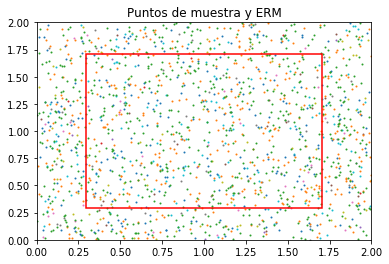

In [204]:
# Iterar para varios tamanos de muestra
# Graficar los puntos de entrenamiento
# Graficar el rectangulo hS resultante
m = 1
i = 0.5
LS_list = np.empty((0,2))
LD_list = np.empty((0,2))
# Create figure and axes
fig,ax = plt.subplots()
while m < m_H:
    S = getSample(int(m))
    ax.scatter(S[:,0], S[:,1], s=1)
    for h in np.nditer(H):
        myLS = LS(h,S)
        myLD = LD(h)
        LS_list = np.append(LS_list,[[float(h),myLS]], axis = 0)
        LD_list = np.append(LD_list,[[float(h),myLD]], axis = 0)
    hS = ERM(H,S)
    i = i + 0.5
    m = round(np.exp(i))
# Create a Rectangle patch
rect = patches.Rectangle((hS,hS),2-2*hS,2-2*hS,linewidth=1.5,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
# Set axis
ax.set(xlim=(0, 2), ylim=(0, 2))
plt.title('Puntos de muestra y ERM')
plt.show()

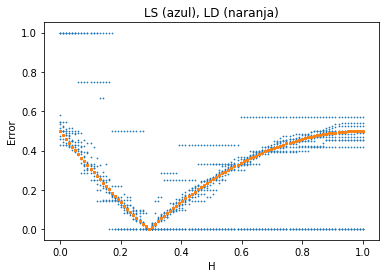

In [205]:
# Graficar los errores de generalizacion y empirico de cada hipotesis
plt.title('LS (azul), LD (naranja)')
plt.scatter(LS_list[:,0],LS_list[:,1], s= 0.5, label = 'LS')
plt.scatter(LD_list[:,0],LD_list[:,1], s = 1.5, label = 'LD')
plt.xlabel('H')
plt.ylabel('Error')
plt.show()

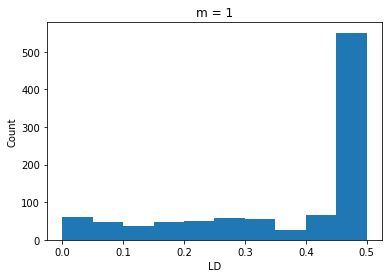

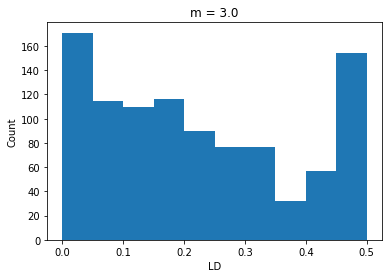

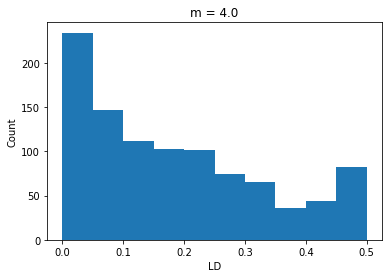

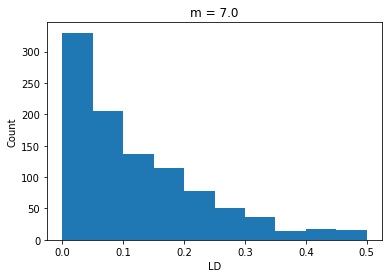

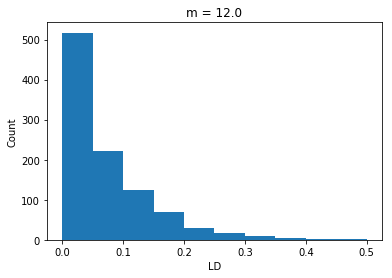

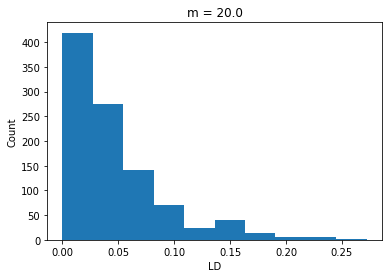

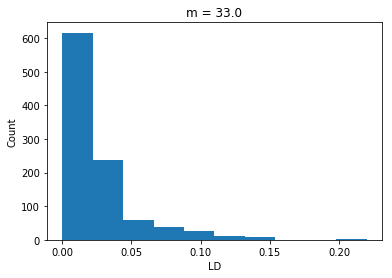

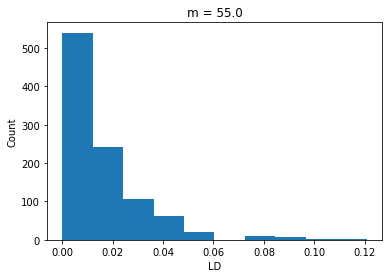

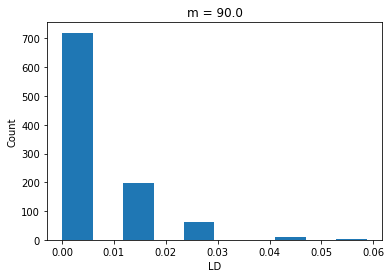

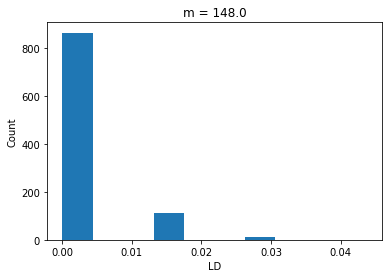

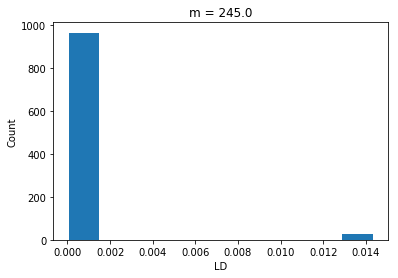

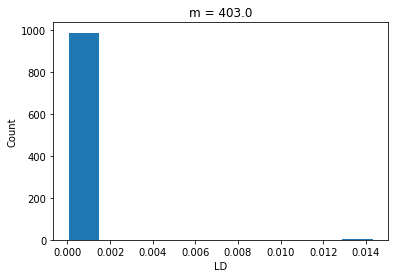

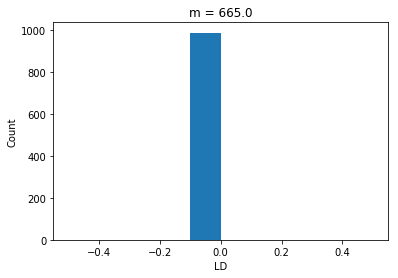

In [210]:
# Iterar varias veces para varios tamanos de muestra
# Graficar un histograma del error
m = 1
i = 0.5
n = 1000
while m < m_H:
    fig,ax = plt.subplots()
    LD_list = np.empty(0)
    plt.title('m = '+str(m))
    plt.xlabel('LD')
    plt.ylabel('Count')
    for n in range(n):
        S = getSample(int(m))
        hS = ERM(H,S)
        myLD = LD(hS)
        LD_list = np.append(LD_list,float(myLD))
    ax.hist(LD_list)
    plt.show()
    i = i + 0.5
    m = round(np.exp(i))